In [204]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import math

In [205]:
def coupling_layer(w, b, m, z):
    X = torch.zeros((z.shape[0], z.shape[1]))
    X[:, m] = z[:, m]
    z_m = torch.reshape(z[:, m], (z[:, m].shape[0], 1))
    w = torch.reshape(w, (1, w.shape[0]))
    theta = torch.exp(torch.tanh(torch.mm(z_m, w) + b))
    X[:, 1-m] = z[:, 1-m] * theta[:, 0] + theta[:, 1]
    return X

def forward_flow(W, B, M, z0):
    Z = z0
    for i in range(len(M)):
        Z = coupling_layer(W[i], B[i], M[i], Z)
    return Z

def inverse_coupling_layer(w, b, m, x):
    Z = torch.zeros((x.shape[0], x.shape[1]))
    Z[:, m] = x[:, m]
    x_m = torch.reshape(x[:, m], (x[:, m].shape[0], 1))
    w = torch.reshape(w, (1, w.shape[0]))
    theta = torch.exp(torch.tanh(torch.mm(x_m, w) + b))
    Z[:, 1-m] = (x[:, 1-m] - theta[:, 1])/ theta[:, 0]
    return Z

def inverse_flow(W, B, M, X):
    for i in range(len(M)):
        X = inverse_coupling_layer(W[i], B[i], M[i], X)
    return X

In [206]:
M = torch.tensor([0,1])
W = torch.tensor(([[-1, 1], [1, -1]]), dtype = torch.float32)
B = torch.tensor(([[1, 1], [1,1]]), dtype = torch.float32)
z0 = torch.tensor(([[1, 2],[3, 4]]), dtype = torch.float32)
X = forward_flow(W, B, M, z0)
print(X)

tensor([[3.0866, 4.6222],
        [8.5234, 4.2419]])


In [207]:
Z0 = inverse_flow(torch.flipud(W), torch.flipud(B), torch.flipud(M), X)
print(Z0)

tensor([[1.0000, 2.0000],
        [3.0000, 4.0000]])


In [220]:
torch.manual_seed(0)
d = 2
N = 5000
z0_iid = torch.randn(N, 2)

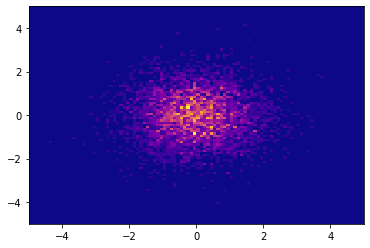

In [221]:
plt.hist2d(list(z0_iid[:,0]), list(z0_iid[:,1]), bins=100, range=[[-5,5],[-5,5]],  cmap = 'plasma')
plt.show()

In [222]:
X_d = forward_flow(W, B, M, z0_iid)

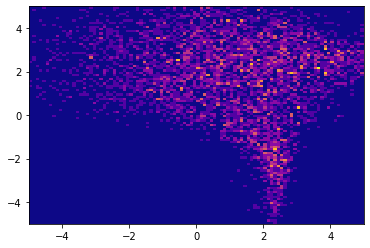

In [223]:
plt.hist2d(list(X_d[:,0]), list(X_d[:,1]), bins=100, range=[[-5,5],[-5,5]],  cmap = 'plasma')
plt.show()

In [224]:
Z0_inv = inverse_flow(torch.flipud(W), torch.flipud(B), torch.flipud(M), X_d)

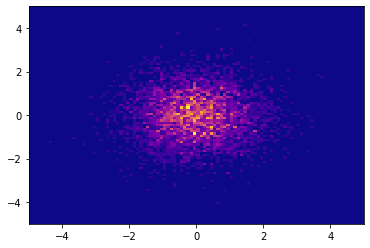

In [225]:
plt.hist2d(list(Z0_inv[:,0]), list(Z0_inv[:,1]), bins=100, range=[[-5,5],[-5,5]],  cmap = 'plasma')
plt.show()